In [1]:
# Import necessary libraries

import matplotlib.pyplot as plt
import numpy as np
import math

import matplotlib.style 
import matplotlib as mpl 

from scipy import linalg
from tqdm import tqdm

import tensorflow as tf
from tensorflow import keras



2024-02-26 10:41:25.993011: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Training a neural network on MNIST

In [2]:
# Load MNIST dataset
mnist = keras.datasets.mnist
(training_images, training_labels), (testing_images, testing_labels) = mnist.load_data()

#resizes intensity of pixels to a scale of 0-1
training_images=training_images/255.0
testing_images=testing_images/255.0



In [3]:
#defining model with a 28x28 input, 128 hidden nodes and 10 outputs

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    
    keras.layers.Dense(128,activation='sigmoid'),
    
    keras.layers.Dense(10)])

model.summary()

In [4]:
#compiling model
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer=tf.keras.optimizers.SGD(learning_rate=1.0),
              metrics=['accuracy'])

#training model using training images and corresponding labels
model.fit(training_images, training_labels,batch_size=100, epochs=10)


loss, accuracy = model.evaluate(testing_images, testing_labels, verbose=0)

print("Accuracy = ", round(accuracy,4)*100, "%")



Epoch 1/10
600/600 [==============================] - 2s 2ms/step - loss: 0.4076 - accuracy: 0.8796
Epoch 2/10
600/600 [==============================] - 1s 2ms/step - loss: 0.1983 - accuracy: 0.9419
Epoch 3/10
600/600 [==============================] - 1s 2ms/step - loss: 0.1458 - accuracy: 0.9575
Epoch 4/10
600/600 [==============================] - 1s 2ms/step - loss: 0.1160 - accuracy: 0.9661
Epoch 5/10
600/600 [==============================] - 1s 1ms/step - loss: 0.0970 - accuracy: 0.9722
Epoch 6/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0827 - accuracy: 0.9762
Epoch 7/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0721 - accuracy: 0.9790
Epoch 8/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0634 - accuracy: 0.9818
Epoch 9/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0563 - accuracy: 0.9842
Epoch 10/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0503 - accuracy: 0.9862

## Decomposing MNIST training data-set into principle components

In [5]:

X_training=np.reshape(training_images,(60000,784))

mu_training=np.mean(X_training,axis=0)
#centered data
x_training=X_training-mu_training
#rho matrix for testing images
rho_training=np.cov(x_training,rowvar=False) 
#eigen values and eigen vectors
vals_training,vecs_training=linalg.eigh(rho_training)

#flipping matricies to to descending order
fvecs_training=np.flip(vecs_training)
fvals_testing=np.flip(vals_training)

P_training=np.dot(x_training,fvecs_training)

## Decomposing Testing data into principle components

In [6]:
X_testing=np.reshape(testing_images,(10000,784))

mu_testing=np.mean(X_testing,axis=0)
#centered data
x_testing=X_testing-mu_testing
#rho matrix for testing images
rho_testing=np.cov(x_testing,rowvar=False) 

#eigen values and eigen vectors
vals_testing,vecs_testing=linalg.eigh(rho_testing)

#flipping matricies to to descending order
fvecs_testing=np.flip(vecs_testing)
fvals_testing=np.flip(vals_testing)

#PCA tensor
P_testing=np.dot(x_testing,fvecs_testing)


### Visualising data (extra)

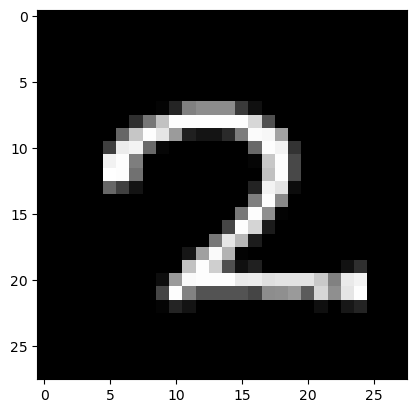

In [7]:
#reconstruct the originl data from the first 100 principal components
reconstructed_data_test = (np.dot(P_testing[:,0:784], fvecs_testing.T[0:784,:])) + mu_testing

#reshape the reconstructed data into 28x28 images
reconstructed_images_testing = reconstructed_data_test.reshape(-1, 28, 28)

plt.imshow(reconstructed_images_testing[77], cmap='gray')  #showing the reconstructed image

## Testing data accuracy vs up to 784 (max)  PCA elements


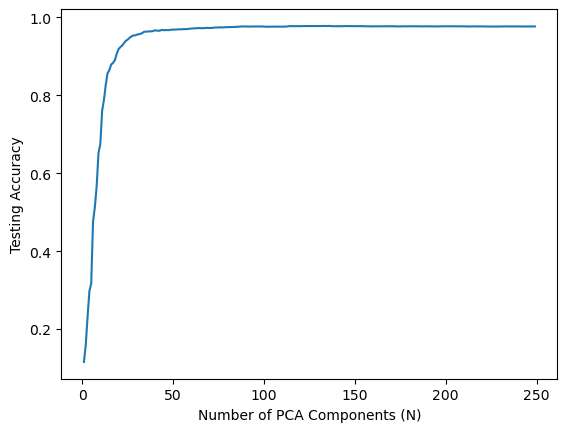

In [8]:
#List to store testing accuracies
accuracies = []

#range of N values to test
N_values = range(1, 250, 1)

for N in N_values:
    
    #reconstruct the test images using the N-best PCA components
    newImageN = (np.dot(P_testing[:,0:N], fvecs_testing.T[0:N,:])) + mu_testing

    #evaluating model with PCA images
    loss, accuracy = model.evaluate(newImageN, testing_labels, verbose=0)
    
    accuracies.append(accuracy)

# Plot N vs testing accuracy
plt.plot(N_values, accuracies)
plt.xlabel('Number of PCA Components (N)')
plt.ylabel('Testing Accuracy')
plt.show()




### Retraining model with 100 best PCA components and testing accuracy

In [9]:
# Reconstruct the original training data from the first 100 principal components
reconstructed_data_training_100 = (np.dot(P_training[:,0:100], fvecs_training.T[0:100,:])) + mu_training

# Reshape the reconstructed data into 28x28 images
reconstructed_images_training_100 = reconstructed_data_training_100.reshape(-1, 28, 28)

#training model with 100 best PCA elements
model.fit(reconstructed_images_training_100, training_labels,batch_size=100, epochs=10)


Epoch 1/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0601 - accuracy: 0.9821
Epoch 2/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0544 - accuracy: 0.9839
Epoch 3/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0498 - accuracy: 0.9853
Epoch 4/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0461 - accuracy: 0.9870
Epoch 5/10
600/600 [==============================] - 2s 4ms/step - loss: 0.0425 - accuracy: 0.9882
Epoch 6/10
600/600 [==============================] - 2s 4ms/step - loss: 0.0395 - accuracy: 0.9890
Epoch 7/10
600/600 [==============================] - 2s 4ms/step - loss: 0.0369 - accuracy: 0.9898
Epoch 8/10
600/600 [==============================] - 2s 4ms/step - loss: 0.0345 - accuracy: 0.9907
Epoch 9/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0323 - accuracy: 0.9914
Epoch 10/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0303 - accuracy: 0.9923

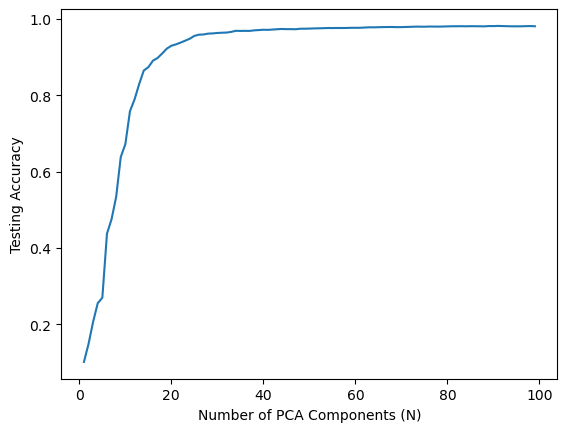

The maximum accuracy is 0.9805


In [10]:
# List to store testing accuracies
accuracies2 = []

# Range of N values to test
N_values2 = range(1, 100, 1)

for N in N_values2:
    
    # Reconstruct the test images using the N-best PCA components
    newImage2 = (np.dot(P_testing[:,0:N], fvecs_testing.T[0:N,:])) + mu_testing

    loss2, accuracy2 = model.evaluate(newImage2, testing_labels, verbose=0)
    
    accuracies2.append(accuracy2)

# Plot N vs testing accuracy
plt.plot(N_values2, accuracies2)
plt.xlabel('Number of PCA Components (N)')
plt.ylabel('Testing Accuracy')
plt.show()

print("The maximum accuracy is", round(accuracies2[-1],4))

### Retraining model with 20 best PCA components and testing accuracy

In [11]:
# Reconstruct the original data from the first 20 principal components
reconstructed_data_training_20 = (np.dot(P_training[:,0:20], fvecs_training.T[0:20,:])) + mu_training

# Reshape the reconstructed data into 28x28 images
reconstructed_images_training_20 = reconstructed_data_training_20.reshape(-1, 28, 28)

#training model on 20 best PCA components
model.fit(reconstructed_images_training_20, training_labels,batch_size=100, epochs=10)

Epoch 1/10
600/600 [==============================] - 1s 2ms/step - loss: 0.1413 - accuracy: 0.9545
Epoch 2/10
600/600 [==============================] - 1s 1ms/step - loss: 0.1142 - accuracy: 0.9639
Epoch 3/10
600/600 [==============================] - 1s 2ms/step - loss: 0.1043 - accuracy: 0.9666
Epoch 4/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0983 - accuracy: 0.9685
Epoch 5/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0918 - accuracy: 0.9713
Epoch 6/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0873 - accuracy: 0.9724
Epoch 7/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0831 - accuracy: 0.9740
Epoch 8/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0802 - accuracy: 0.9746
Epoch 9/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0773 - accuracy: 0.9761
Epoch 10/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0753 - accuracy: 0.9765

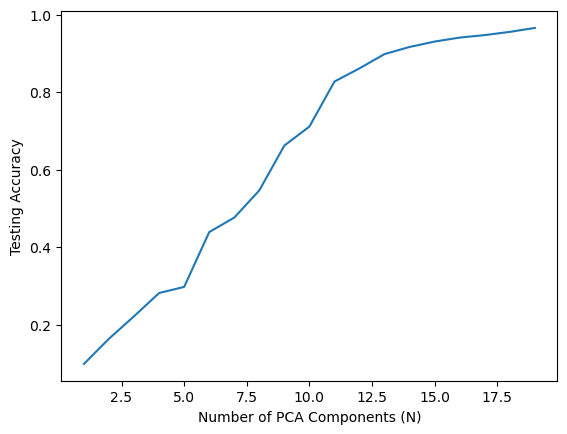

The accuracy is 0.9659


In [12]:
# List to store testing accuracies
accuracies3 = []

# Range of N values to test
N_values3 = range(1, 20, 1)

for N in N_values3:
    
    # Reconstruct the test images using the N-best PCA components
    newImage3 = (np.dot(P_testing[:,0:N], fvecs_testing.T[0:N,:])) + mu_testing

    #evaluating model with PCA images
    loss3, accuracy3 = model.evaluate(newImage3, testing_labels, verbose=0)
    
    accuracies3.append(accuracy3)

# Plot N vs testing accuracy
plt.plot(N_values3, accuracies3)
plt.xlabel('Number of PCA Components (N)')
plt.ylabel('Testing Accuracy')
plt.show()

print("The accuracy is", round(accuracies3[-1],4))

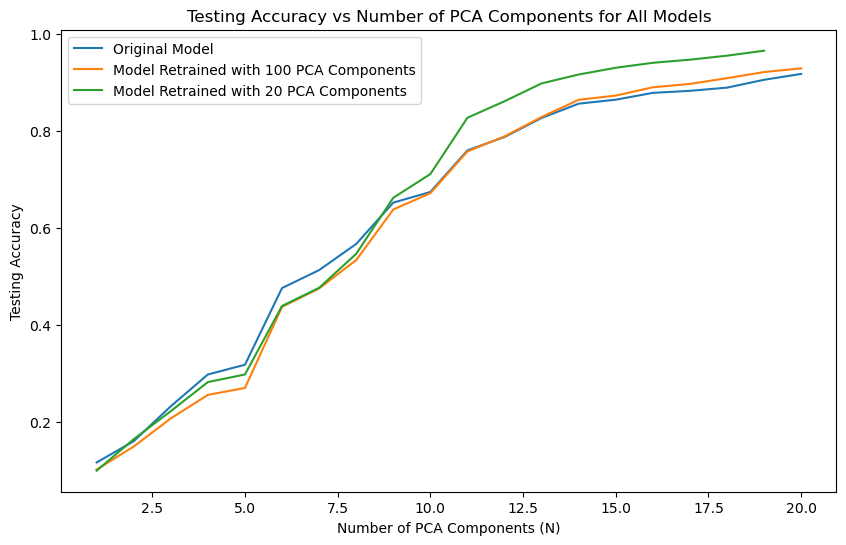

In [13]:
#ploting the N comps vs testing accuracy for all models for comparison
plt.figure(figsize=(10, 6))

plt.plot(N_values[:20], accuracies[:20], label='Original Model')
plt.plot(N_values2[:20], accuracies2[:20], label='Model Retrained with 100 PCA Components')
plt.plot(N_values3[:20], accuracies3[:20], label='Model Retrained with 20 PCA Components')

plt.xlabel('Number of PCA Components (N)')
plt.ylabel('Testing Accuracy')
plt.title('Testing Accuracy vs Number of PCA Components for All Models')
plt.legend()
plt.show()

### Analysis
Upon examining the graph displaying variance versus PCA index, it's evident that nearly all of the variance is eradicated after utilizing the top 100 PCA components. Consequently, we anticipate minimal variance in performance between the model trained with 100 PCA components and the model trained on the original MNIST dataset. As anticipated, we observe a notable decrease in performance compared to the model retrained on 
\100 PCA components.

The 20 PCA model performs slightly worse as expected and reaches a lower accuracy. 

